# Imports

In [1]:
# Standard library imports
from datetime import datetime
import json
import logging as log
import os
import requests
import sys

# Third party imports
import pandas as pd

# Local application imports
try:
    sys.path.insert(1, os.path.join(os.getcwd(), '../'))
    from scrap_figshare import read_input_file, search_figshare_with_query
    from scrap_figshare import extract_records, request_figshare_dataset_with_id
    from scrap_figshare import main_scrap_figshare
    
    from analyze import prep_analyze, read_df
    from analyze import prepare_timeline_df, plot_timeline_dataset_files, plot_timeline_dataset_authors
    from analyze import prepare_ext_count_df, plot_timeline_category, plot_timeline_engine, plot_timeline_size_engine, plot_extension_engine
    from analyze import get_info_from_mdp, plot_temp_count
    from analyze import get_info_from_gro, plot_sys_size_count
    
except (ModuleNotFoundError, ImportError) as e:
    print(f"{type(e)} fileure: {e}")
else:
    print("Import succeeded")


Import succeeded


# Functions

In [2]:
class AttrDict(dict):
    """Argument parser.

    This function parses a dictionary into a argparse-like dictionary.

    Returns
    -------
    argparse dictionary
    """
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self

# FigShare fetching and analysis

## Fetch content

In [3]:
%%time
# Make input parameter
args = AttrDict()
args.update({'input_file': os.path.join(os.getcwd(), '../query.yml')}) #query_dev.yml
# Read parameter file
datasets_df, files_df = main_scrap_figshare(args)
datasets_df

Reading parameters from: /Users/kxp752/repos/mdws/notebooks/../query.yml
Looking for filetype: tpr
Number of datasets found: 23
Number of files found: 958
------------------------------
Looking for filetype: gro
Number of datasets found: 35
Number of files found: 267
------------------------------
Looking for filetype: mdp
Additional keywords for query: molecular dynamics, molecular dynamic, molecular-dynamics, molecular-dynamic, namd, md trajectory, md trajectories, md simulation, md simulations, amber, gromacs, charmm, plumed
Number of datasets found: 108
Number of files found: 28
------------------------------
Looking for filetype: itp
Additional keywords for query: molecular dynamics, molecular dynamic, molecular-dynamics, molecular-dynamic, namd, md trajectory, md trajectories, md simulation, md simulations, amber, gromacs, charmm, plumed
Number of datasets found: 110
Number of files found: 8
------------------------------
Looking for filetype: ndx
Number of datasets found: 1
Numb

,dataset_id,origin,doi,date_creation,date_last_modified,date_fetched,file_number,download_number,view_number,access_right,license,title,author,keywords
0,16822969,FigShare,10.6084/m9.figshare.16822969.v4,2021-12-05,2021-12-05,2022-01-03T18:34:13,4,None,None,public,CC BY 4.0,ACN simulation files,Vitaly V. Chaban,ACN
1,7007531,FigShare,10.6084/m9.figshare.7007531.v2,2018-08-25,2018-08-27,2022-01-03T18:34:13,77,None,None,public,CC BY 4.0,a-Synuclein short MD simulations:WT,Hiroki Otaki,Molecular dynamics simulation
2,7011008,FigShare,10.6084/m9.figshare.7011008.v1,2018-08-25,2018-08-25,2022-01-03T18:34:14,77,None,None,public,CC BY 4.0,a-Synuclein short MD simulations:A53T[A-I],Hiroki Otaki,Molecular dynamics simulation
3,6960098,FigShare,10.21942/uva.6960098,2019-10-03,2019-10-03,2022-01-03T18:34:14,22,None,None,public,CC BY 4.0,Predicting the mechanism and rate of H-NS bind...,J. Vreede,Molecular Dynamics ; Nucleoid Associated Proteins
4,8046437,FigShare,10.6084/m9.figshare.8046437.v1,2019-04-26,2019-04-26,2022-01-03T18:34:14,2,None,None,public,CC BY 4.0,Short molecular dynamics of a peptide inside a...,davide cruz,MDAnalysis software package ; membrane bilayer...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,13428404,FigShare,10.6084/m9.figshare.13428404.v1,2020-12-19,2020-12-19,2022-01-03T19:34:28,1,None,None,public,CC BY 4.0,Connection between a subcontinental plume and ...,yanan shi,plume ; Craton ; Thinning ; mid-lithospheric d...
6712,14472141,FigShare,10.3389/fmicb.2021.640469.s003,2021-04-23,2021-04-23,2022-01-03T19:34:29,1,None,None,public,CC BY 4.0,Data_Sheet_3_Mycoplankton Biome Structure and ...,Yanyan Yang,aquatic fungi ; estuary ; QPE analysis ; salin...
6713,11949684,FigShare,10.1021/acs.est.9b07148.s005,2020-03-06,2020-03-06,2022-01-03T19:34:29,1,None,None,public,CC BY-NC 4.0,Methane\nEmissions from Offshore Oil and Gas P...,Tara I. Yacovitch,plume ; facility ; 13 C ; background ethane en...
6714,11881941,FigShare,10.3389/fmars.2020.00047.s001,2020-02-21,2020-02-21,2022-01-03T19:34:30,1,None,None,public,CC BY 4.0,Data_Sheet_1_Vertical Distribution Patterns of...,Heather Judkins,squid ; octopod ; vertical migration ; DEEPEND...


## Analysis & plots

### Reading

In [4]:
# read dataframe from datasets and files
dataset_tsv = "figshare_datasets.tsv"
files_tsv = "figshare_files.tsv"
args = AttrDict()
args.update({'input_dataset_file': os.path.join(os.getcwd(), dataset_tsv), 
             'input_files_file': os.path.join(os.getcwd(), files_tsv),
            })
# Call extract main prep function
datasets_df, files_df, all_df = prep_analyze(args)

Number of files: 4244
Number of datasets: 6716
Number of files after cleaning: 4244
Number of datasets: 1766


### Plotting dataset statistics (timeline and counts)

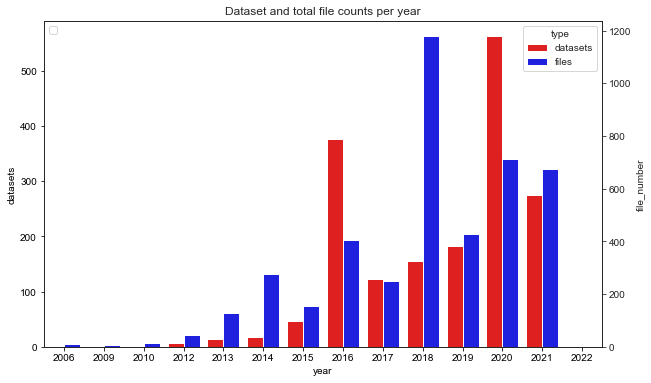

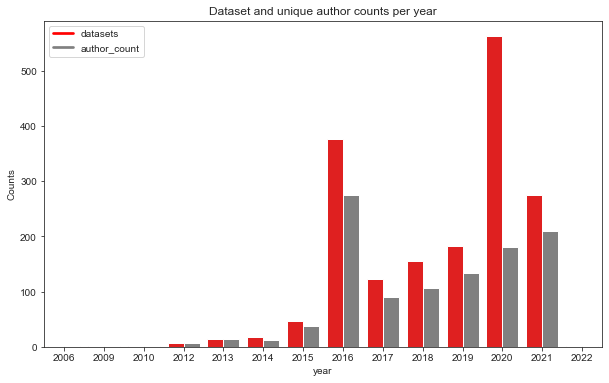

In [5]:
# timeline plot
timeline_ana_df = prepare_timeline_df(datasets_df)
plot_timeline_dataset_files(timeline_ana_df)
plot_timeline_dataset_authors(timeline_ana_df)



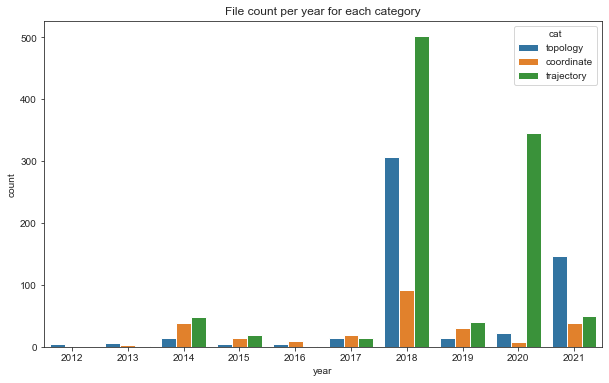

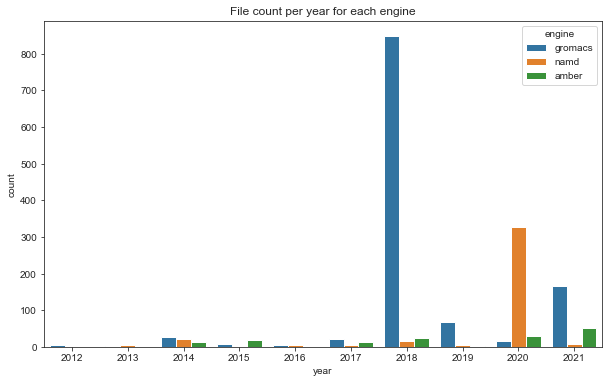

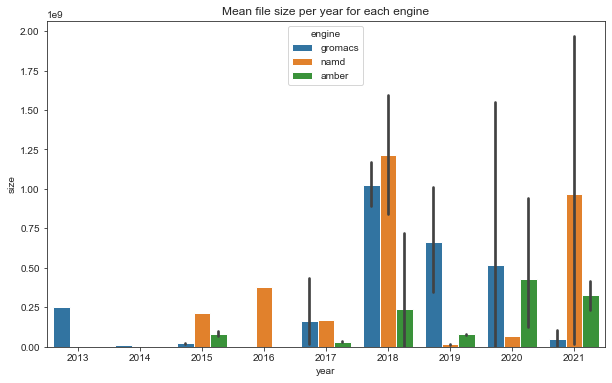

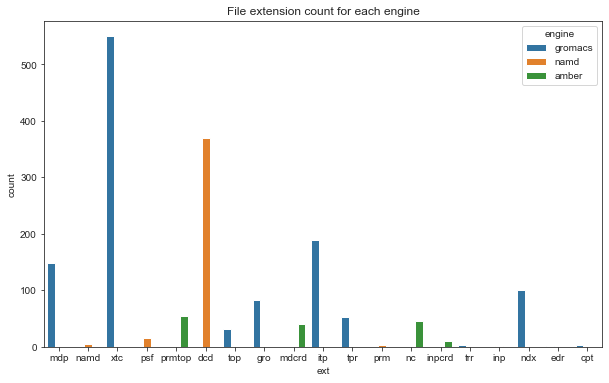

In [6]:
# plot file-dependent timeline plots
count_article_df = prepare_ext_count_df(all_df)
plot_timeline_category(count_article_df)
plot_timeline_engine(count_article_df)
plot_timeline_size_engine(count_article_df)
plot_extension_engine(count_article_df)

### Plotting information grapped from file content (e.g. temperature from mdp & filesize from gro)

Number of mdp files: 149


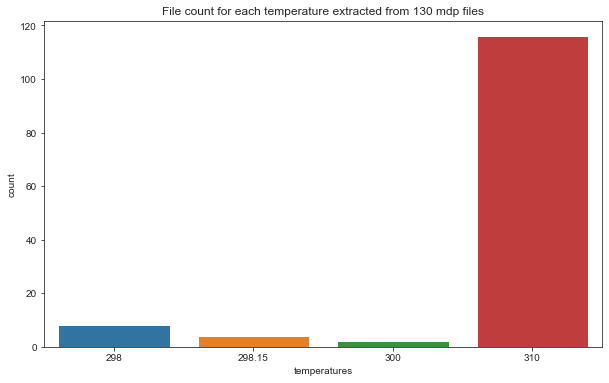

CPU times: user 5.09 s, sys: 643 ms, total: 5.73 s
Wall time: 1min 55s


In [7]:
%%time
# get mdp information
temp_df = get_info_from_mdp(all_df)
# plot mdp information
plot_temp_count(temp_df)


Number of gro files: 82
ERROR for dataset ID: 7795913, file name: comp1_oct.gro


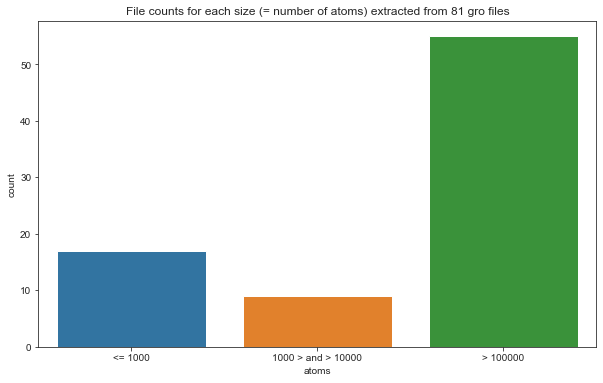

CPU times: user 5.68 s, sys: 4.9 s, total: 10.6 s
Wall time: 2min 53s


In [8]:
%%time
# get mdp information
sys_size_df = get_info_from_gro(all_df)
# plot information
plot_sys_size_count(sys_size_df)
